In [30]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import warnings

In [9]:
#Provided Code
class gaussian_pulse(object):
    """
    Generates a gaussian pulse signal
    Arguments:
        μ, σ: mean and variance of the Gaussian pulse
        T: duration of the signal (int)
        fs: sampling frequncy (int)
    """

    def __init__(self, μ, σ, T, fs):
        self.N = int(np.floor( T * fs))

        # Create the active part
        # self.sig = signal.gaussian(self.N, std=σ)
        self.t = np.arange(0, T, 1 / fs)
        self.sig = np.exp(-(self.t-μ)**2 / (2 * σ**2))

        # Create the time array
        self.t = np.arange(0, T, 1 / fs)
class dft():
    def __init__(self, x, fs, K=None):
        """
        :param x: Input vector x contains the discrete signal
        :param fs: Input integer fs contains the sample frequency
        :param K: Input positive integer that determines the number of coeffients
        used to calculate the DFT. If K is not provided, K=length(x).
        """
    # START: SANITY CHECK OF INPUTS.
        if (type(fs) != int) or (fs<=0):
            raise NameError('The frequency fs should be a positive integer.')
        if not isinstance(x, np. ndarray):
            raise NameError('The input signal x μst be a numpy array.')
        if isinstance(x, np. ndarray):
            if x.ndim!=1:
                raise NameError('The input signal x μst be a numpy vector array.')
        self.x=x
        self.fs=fs
        self.N=len(x)
        if K == None:
            K = len(self.x)
        # START: SANITY CHECK OF INPUTS.
        if (type(K) != int) or (K <= 0) or (K < 0):
            raise NameError('K should be a positive integer.')
        self.K=K
        self.f=np.arange(self.K)*self.fs/self.K # (0:K-1) just creates a vector from 0 to K by steps of 1.
        self.f_c=np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*self.fs/self.K
        # This accounts for the frequencies
        # centered at zero. I want to be guaranteed that k=0 is always a
        # possible k. Then, I also have to account for both even and odd choices
        # of K, and that's why the floor() function appears to round down the
        # numbers.
    def changeK(self,K):
        """
        :param K: Input positive integer that determines the number of coeffients
        used to calculate the DFT. This function changes the attribute K of the class.
        """
        if (type(K) != int) or (K <= 0) or (K <  0):
            raise NameError('K should be a positive integer.')
        old_K=self.K
        self.K=K
        self.f=np.arange(self.K)*self.fs/self.K # (0:K-1) just creates a vector from 0 to K by steps of 1.
        self.f_c=np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*self.fs/self.K
        # This accounts for the frequencies
        # centered at zero. I want to be guaranteed that k=0 is always a
        # possible k. Then, I also have to account for both even and odd choices
        # of K, and that's why the floor() function appears to round down the
        # numbers.
        print('The value of K was succefully change from %d to %d'%(old_K,self.K))
        pass

    def solve3(self):
        """
        \\\\\ METHOD 3: Built-in fft() function
        Even though the matrix form is fast, it is still not fast enough for large
        signals x. For that, it is better to use the built in fft() function which is
        the optimal way to compute a dft. Besides, it is really easy to code.
        """
        X=np.fft.fft(self.x,self.K)/np.sqrt(self.N);
        # \\\\\ CENTER FFT.
        X_c=np.roll(X,int(np.ceil(self.K/2-1))) # Circularly shift X to get it centered in f_c==0
        return [self.f,X,self.f_c,X_c]
    
class idft():
    """
    idft Inverse Discrete Fourier transform.
    """
    def __init__(self, X, fs, N, K=None):
        """
        :param X: Input DFT X
        :param fs: Input integer fs contains the sample frequency
        :param N: The number of total signal samples N
        :param K: Input positive integer that determines the number of coeffients
        used to calculate the iDFT.
        """
        self.X=X
        self.fs=fs
        self.N=N 
        self.K=K
        if self.K==None:
            self.K=int(len(X)/2)-1

    def solve_K(self):
        """
        \\\\\ METHOD: Compute the iDFT with truncated K coefficients (Due to computation complexity, we will not use it in Section 2)
        :return iDFT x of duration N from partial DFT X, i.e., X[0], ..., X[K] with K < N/2
        :Treal the realt time vector of size N
        """
        x=np.zeros(self.N)
        
        for n in range(self.N):
            x[n] = 1/np.sqrt(self.N)*self.X[0]*np.exp(1j*2*cmath.pi*0*n/self.N)
            for k in range(1,self.K+1): 
                x[n] = x[n] + 1/np.sqrt(self.N)*self.X[k]*np.exp(1j*2*cmath.pi*k*n/self.N)
                x[n] = x[n] + 1/np.sqrt(self.N)*np.conj(self.X[k])*np.exp(-1j*2*cmath.pi*k*n/self.N)
                
        Ts= 1/self.fs
        Treal= np.arange(self.N)*Ts

        return x, Treal
    
    def solve_ifft(self):
        """
        \\\\\ METHOD: Compute the iDFT with provided function np.fft.ifft (Computationally efficient)
        :Treal the realt time vector of size N
        """
        x=np.fft.ifft(self.X,self.N)*np.sqrt(self.N)
                
        Ts= 1/self.fs
        Treal= np.arange(self.N)*Ts

        return x, Treal

In [60]:
class q_22(object):
#Subsample Object    

    def __init__(self, x, T_s, τ):
        
        self.x = x
        self.T_s = T_s
        self.τ = τ
        self.f_s = int(1/T_s)
        self.f_ss = int(1/τ)
        self.N = len(x)
        
#Without prefiltering
    def solve(self):

        step = int(self.τ/self.T_s)
        x_s = self.x[0::step]
        x_delta = np.zeros(self.N)
        x_delta[0::step] = x_s
        
        return x_s, x_delta
        
#2.4 With Prefiltering
    def solve2(self):
        fmax = self.f_ss/2
        DFT = dft(self.x, self.f_s)
        [_, _, f_c, X_c] = DFT.solve3()
        index_min  = np.min(np.where(f_c >= -fmax)[0])
        index_max = np.max(np.where(f_c <= fmax)[0])
        X_band = np.zeros(self.N)
        X_band[index_min:index_max] = X_c[index_min:index_max]
        X_band = np.roll(X_band, int(np.floor(self.N/2+1)))
        iDFT = idft(X_band, self.f_s, self.N)
        x_band, t = iDFT.solve_ifft()

        step = int(self.τ/self.T_s)
        x_s = x_band[0::step]
        x_delta = np.zeros(self.N)
        x_delta[0::step] = x_s
        
        return x_s, x_delta

Text(0, 0.5, 'Signal')

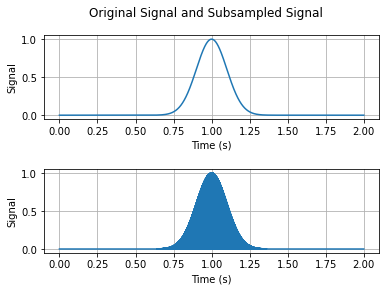

In [19]:
#Problem 2.2
σ = 0.1
μ = 1
f_s = 40000
f_ss = 4000
T = 2
N = T*f_s

gaussian_obj = gaussian_pulse(μ, σ, T, f_s)
x = gaussian_obj.sig
t = gaussian_obj.t
subsample = q_22(x, 1/f_s, 1/f_ss)
x_s, x_delta = subsample.solve()

fig, axs = plt.subplots(2)
axs[0].grid()
axs[1].grid()
fig.suptitle('Original Signal and Subsampled Signal' )
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
axs[0].plot(t, x)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Signal')
axs[1].plot(t, x_delta)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Signal')

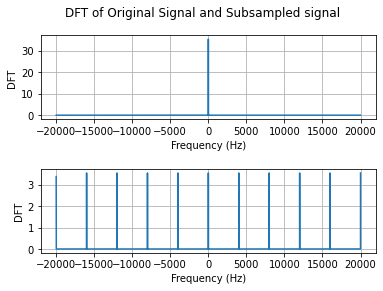

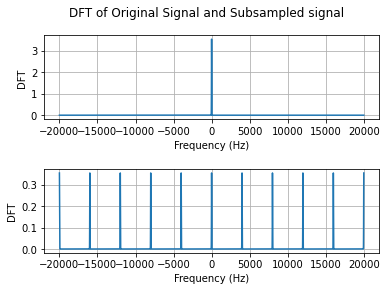

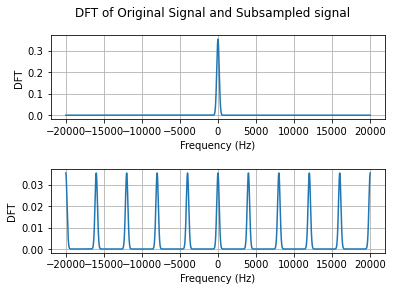

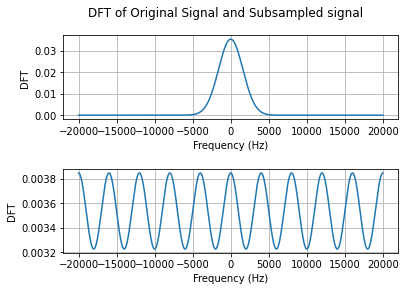

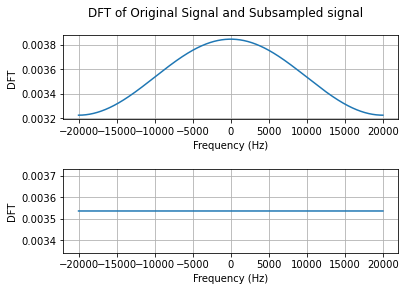

In [27]:
def q_23():
    σ_list = [.1, .01, .001, .0001, .00001]
    for σ in σ_list:
        gaussian_obj = gaussian_pulse(μ, σ, T, f_s)
        x = gaussian_obj.sig
        t = gaussian_obj.t
        subsample = q_22(x, 1/f_s, 1/f_ss)
        x_s, x_delta = subsample.solve()
        DFT_x = dft(x, f_s)
        [_, _, freqs_c, X_c] = DFT_x.solve3()

        DFT_x_delta = dft(x_delta, f_s)
        [_, _, _, X_delta_c] = DFT_x_delta.solve3()

        fig, axs = plt.subplots(2)
        axs[0].grid()
        axs[1].grid()
        fig.suptitle('DFT of Original Signal and Subsampled signal' )
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
        axs[0].plot(freqs_c, abs(X_c))
        axs[0].set_xlabel('Frequency (Hz)')
        axs[0].set_ylabel('DFT')
        axs[1].plot(freqs_c, abs(X_delta_c))
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('DFT')

q_23()    



For cases 1, 2, and 3 we see no aliasing. The frequencies are sufficiently far apart that we get no superposition in our DFT of x modulated by a Dirac train. In cases 4 and 5, though, we can see that as we decrease the sigma value, the DFTs become significantly wider, and we see significant aliasing in the DFTs of our Dirac train modulated x's, since we see a greater superposition of frequencies. Notice how for sigma = 1x10^-5, we get a seemingly straight line due to the extreme superposition of waves.

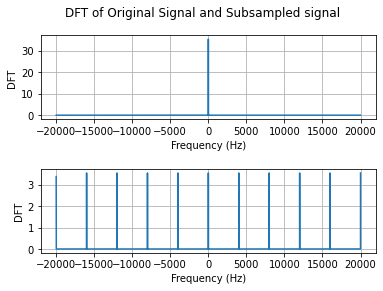

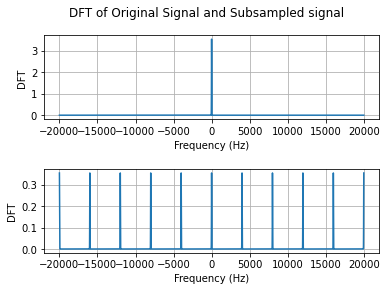

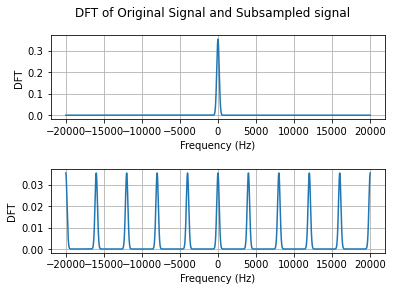

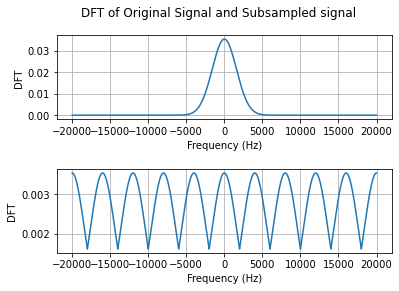

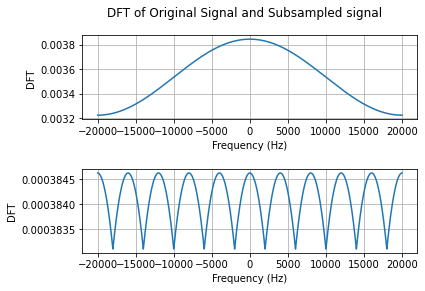

In [50]:
#Problem 2.5
def q_25():
    σ_list = [.1, .01, .001, .0001, .00001]
    warnings.filterwarnings("ignore")
    for σ in σ_list:
        gaussian_obj = gaussian_pulse(μ, σ, T, f_s)
        x = gaussian_obj.sig
        t = gaussian_obj.t
        subsample = q_22(x, 1/f_s, 1/f_ss)
        x_s, x_delta = subsample.solve2()
        DFT_x = dft(x, f_s)
        [_, _, freqs_c, X_c] = DFT_x.solve3()

        DFT_x_delta = dft(x_delta, f_s)
        [_, _, _, X_delta_c] = DFT_x_delta.solve3()

        fig, axs = plt.subplots(2)
        axs[0].grid()
        axs[1].grid()
        fig.suptitle('DFT of Original Signal and Subsampled signal' )
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
        axs[0].plot(freqs_c, abs(X_c))
        axs[0].set_xlabel('Frequency (Hz)')
        axs[0].set_ylabel('DFT')
        axs[1].plot(freqs_c, abs(X_delta_c))
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('DFT')
    
q_25()    


Man, this is so cool. As we can see, prefiltering had no effect on our first three cases, since there was no superposition of waves to begin with. With the cases that had a superposition of waves, however, we can see that the the DFT of x modulated with the Dirac train no longer gives us a superposition of waves, and that each individual wave touches 0 on both ends. We now have a much easier time trying to reconstruct x in cases 4 and 5, since we removed the superposition; however, our reconstructed signals will have noticably less energy than our original x, because the low pass filter removed all frequencies greater than our bandwith in order to prevent overlap of waves.

In [ ]:
#Problem 2.6 Part 1
class reconstruct():
    
    def __init__(self, x_s, T_s, τ):
        
        self.x_s = x_s
        self.T_s = T_s
        self.f_s = np.int(1/T_s)
        self.τ = τ
        self.nu = np.int(1/τ)
        self.N = len(x_s)*np.int(τ/T_s)
        
    def solve(self):
        
        x = np.zeros(self.N)
        step = np.int(self.τ/self.T_s)
        x[0::step] = self.x_s
        DFT_obj = dft(x,self.f_s)
        [_,_,f_c,X_c] = DFT_obj.solve3()
        fmax = self.nu/2
        index_min  = np.min(np.where(f_c >= -fmax)[0])
        index_max = np.max(np.where(f_c <= fmax)[0])
        X_band = np.zeros(self.N)
        X_band[index_min:index_max] = step*X_c[index_min:index_max]
        X_band = np.roll(X_band, np.int(np.floor(self.N/2+1)))
        iDFT = idft(X_band, self.f_s, self.N)
        x_band, t = iDFT.solve_ifft()
        
        return x_band

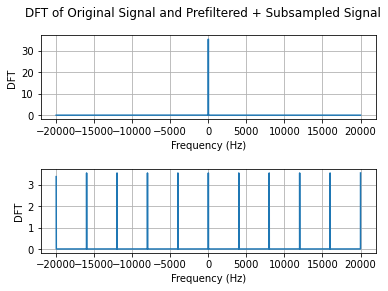

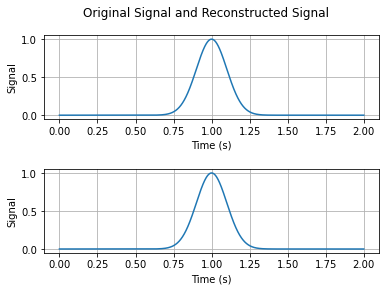

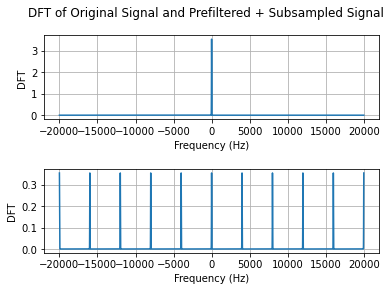

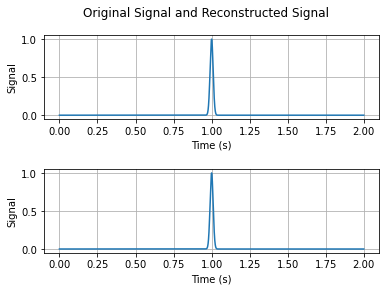

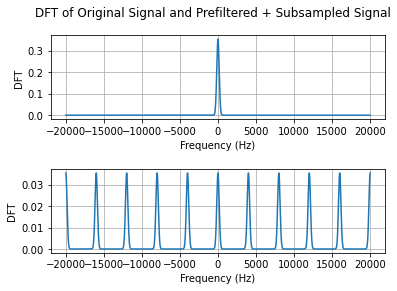

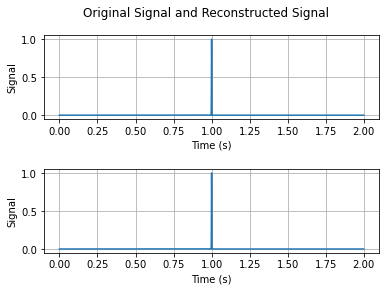

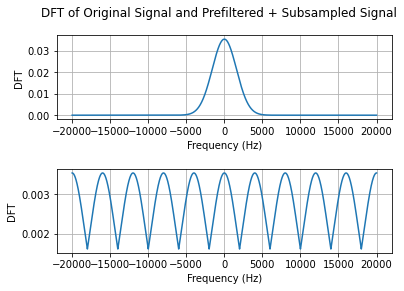

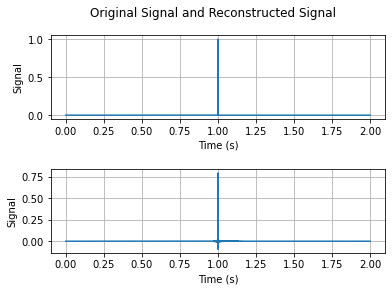

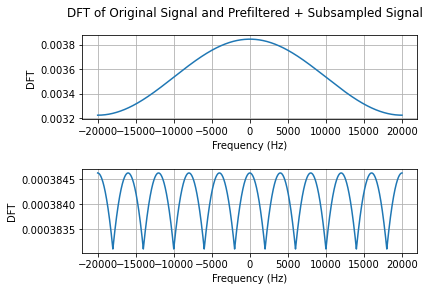

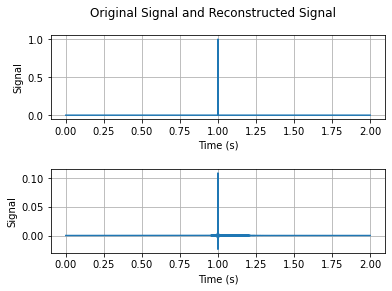

In [67]:
#Problem 2.6 Part 2
σ_list = [.1, .01, .001, .0001, .00001]
warnings.filterwarnings("ignore")

for σ in σ_list:
    gaussian_obj = gaussian_pulse(μ, σ, T, f_s)
    x = gaussian_obj.sig
    t = gaussian_obj.t
    subsample = q_22(x, 1/f_s, 1/f_ss)
    x_s, x_delta = subsample.solve2()

    DFT_x = dft(x, f_s)
    [_, _, freqs_c, X_c] = DFT_x.solve3()

    DFT_x_delta = dft(x_delta, f_s)
    [_, _, _, X_delta_c] = DFT_x_delta.solve3()

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('DFT of Original Signal and Prefiltered + Subsampled Signal' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[0].plot(freqs_c, abs(X_c))
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('DFT')
    axs[1].plot(freqs_c, abs(X_delta_c))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')


    reconstruct_obj = reconstruct(x_s, 1/f_s, 1/f_ss)
    x_r = reconstruct_obj.solve()

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Signal and Reconstructed Signal' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[0].plot(t, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(t, x_r)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')

This confirms our results mentioned in part 2.5! As we can see, for the first three cases, sigma = .1, .01, and .001, the reconstructed signals have the exact same shape and energy as the original, as no frequency was cutoff by prefiltering, and no information was lost through aliasing. In cases 4 and 5, we see a different story, though. In case 4, we see that while the prefiltering allowed our reconstruction to keep nearly the same shape as our original, the reconstructed signal has only ~80% of our original, which is substantial energy loss as it is; however, case 5 is far worse. Case 5 with sigma = 1x10^-5 shows that we can still lose a substantial amount of the original shape, and a terrible amount of energy through prefiltering. The reconstruction of case 5 has only ~12% of the original signal's energy, and has a good amount of noise at the bottom of the wave that was not present in our original.